In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
%matplotlib inline
df_corr = pd.read_csv('C:\\Users\\Brend\\Downloads\\correlation_top42.csv', index_col = 'name', encoding = "UTF-8")
df_disrupt = pd.read_csv('C:\\Users\\Brend\\Downloads\\disrupt_top42.csv', index_col = 'name', encoding = "UTF-8")
df_all = df_corr.join(df_disrupt, how = 'outer')
print("Total: %d authors" % df_all.shape[0])

Total: 1965872 authors


In [2]:
df_trimmed = df_all[df_all['num_pubs'] >= 50]
df_trimmed = df_trimmed[df_trimmed['TotalConns'] >= 25]
print("Remaining after trimming: %d authors" % df_trimmed.shape[0])

Remaining after trimming: 368618 authors


In [3]:
linear_metrics = ['pct_collab_linauth', 'pct_collab_linprof', 
                  'pct_collab_sqrtauth', 'pct_collab_sqrtprof', 
                  'pct_collab_unweighted', 'InterClusterRatio', 
                  'IntraClusterRatio']
log_metrics = ['IntraCommunityFocus', 'InterCommunityFocus']
all_metrics = linear_metrics + log_metrics
impact = ['avg_PR', 'max_PR', 'avg_AR', 'max_AR']
disrupt = ['avg_disrupt', 'max_disrupt', 'median_disrupt', 'min_disrupt']

In [4]:
df_log = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log[[col]]
    df_log[col + '_log'] = log_col.apply(np.log, axis=0)
df_log = df_log[[col for col in df_log.columns if 'log' in col]]

In [5]:
df_log_adjusted = df_trimmed.copy()
for col in df_trimmed.columns:
    log_col = df_log_adjusted[[col]]
    df_log_adjusted[col + '_log_adj'] = log_col.apply(lambda x: np.log(x+1), axis=0)
df_log_adjusted = df_log_adjusted[[col for col in df_log_adjusted.columns if 'log' in col]]

In [6]:
from sklearn.preprocessing import StandardScaler
df_scaled = df_trimmed.copy()
for col in df_trimmed.columns:
    ss = StandardScaler()
    scaled_col = df_scaled[[col]]
    df_scaled[col + '_zscore'] = ss.fit_transform(scaled_col)
df_zscores = df_scaled[[col for col in df_scaled.columns if 'zscore' in col]]

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('r2 scores:')
d = dict()
for x_col in linear_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_zscores[[x_col + '_zscore']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_zscore'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

r2 scores:


,pct_collab_linauth_zscore,pct_collab_linprof_zscore,pct_collab_sqrtauth_zscore,pct_collab_sqrtprof_zscore,pct_collab_unweighted_zscore,InterClusterRatio_zscore,IntraClusterRatio_zscore
avg_PR,0.0976,0.0696,0.1281,0.0988,0.1257,0.0003,0.0003
max_PR,0.0430,0.0084,0.0407,0.0198,0.0525,0.0018,0.0018
avg_AR,0.0748,0.0767,0.1182,0.1114,0.1436,0.0008,0.0008
max_AR,0.0328,0.0111,0.0383,0.0260,0.0664,0.0007,0.0007


In [8]:
print('coef_:')
d = dict()
for x_col in linear_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_zscores[[x_col + '_zscore']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(round(reg.coef_[0][0], 4))
        index_list.append(y_col)
    d[x_col + '_zscore'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

coef_:


,pct_collab_linauth_zscore,pct_collab_linprof_zscore,pct_collab_sqrtauth_zscore,pct_collab_sqrtprof_zscore,pct_collab_unweighted_zscore,InterClusterRatio_zscore,IntraClusterRatio_zscore
avg_PR,0.1474,0.1244,0.1688,0.1482,0.1672,-0.0076,0.0076
max_PR,0.2303,0.1018,0.2240,0.1562,0.2545,0.0467,-0.0467
avg_AR,0.0986,0.0998,0.1239,0.1203,0.1365,-0.0104,0.0104
max_AR,0.1840,0.1074,0.1990,0.1638,0.2619,0.0264,-0.0264


In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('r2 scores:')
d = dict()
for x_col in log_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_log_adjusted[[x_col + '_log']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_log'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

r2 scores:


,IntraCommunityFocus_log,InterCommunityFocus_log
avg_PR,0.0103,0.0006
max_PR,0.0077,0.0013
avg_AR,0.0134,0.0004
max_AR,0.0098,0.0010


In [10]:
print('coef_:')
d = dict()
for x_col in log_metrics:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_log_adjusted[[x_col + '_log']]
        y = df_log[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(round(reg.coef_[0][0], 4))
        index_list.append(y_col)
    d[x_col + '_log'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

coef_:


,IntraCommunityFocus_log,InterCommunityFocus_log
avg_PR,0.1183,0.0375
max_PR,0.2411,0.1242
avg_AR,0.1032,0.0224
max_AR,0.2495,0.0990


In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('r2 scores:')
d = dict()
df_log_adjusted_notna = df_log_adjusted.dropna(subset=['max_disrupt_log_adj'])
df_reg = df_log_adjusted_notna.join(df_log, how = 'left')
for x_col in disrupt:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_reg[[x_col + '_log_adj']]
        y = df_reg[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_log_adj'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

r2 scores:


,avg_disrupt_log_adj,max_disrupt_log_adj,median_disrupt_log_adj,min_disrupt_log_adj
avg_PR,0.0086,0.0215,0.0000,0.0002
max_PR,0.0146,0.0854,0.0001,0.0151
avg_AR,0.0001,0.0056,0.0009,0.0003
max_AR,0.0033,0.0555,0.0002,0.0080


In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('coef_:')
d = dict()
df_log_adjusted_notna = df_log_adjusted.dropna(subset=['max_disrupt_log_adj'])
df_reg = df_log_adjusted_notna.join(df_log, how = 'left')
for x_col in disrupt:
    score_list = []
    index_list = []
    for y_col in impact:
        X = df_reg[[x_col + '_log_adj']]
        y = df_reg[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.coef_[0][0], 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_log_adj'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

coef_:


,avg_disrupt_log_adj,max_disrupt_log_adj,median_disrupt_log_adj,min_disrupt_log_adj
avg_PR,3.0426,0.4155,0.1899,-0.0651
max_PR,9.3306,1.9523,1.7804,-1.4700
avg_AR,0.2414,0.1621,-1.9283,0.0717
max_AR,4.0311,1.4408,-2.7292,-0.9774


In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('r2 scores:')
d = dict()
df_log_notna = df_log.dropna(subset=['max_disrupt_log'])
df_reg = df_log_notna.join(df_zscores, how = 'left')
df_reg = df_reg[df_reg['min_disrupt_log'] > -100]
for x_col in linear_metrics:
    score_list = []
    index_list = []
    for y_col in disrupt:
        X = df_reg[[x_col + '_zscore']]
        y = df_reg[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.score(X, y), 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_log'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

r2 scores:


,pct_collab_linauth_log,pct_collab_linprof_log,pct_collab_sqrtauth_log,pct_collab_sqrtprof_log,pct_collab_unweighted_log,InterClusterRatio_log,IntraClusterRatio_log
avg_disrupt,0.0419,0.0106,0.0243,0.0060,0.0015,0.0040,0.0040
max_disrupt,0.0346,0.0082,0.0194,0.0042,0.0007,0.0013,0.0013
median_disrupt,0.0429,0.0099,0.0262,0.0062,0.0023,0.0110,0.0110
min_disrupt,0.0362,0.0117,0.0238,0.0088,0.0058,0.0281,0.0281


In [8]:
import numpy as np
from sklearn.linear_model import LinearRegression
print('coef_:')
d = dict()
df_log_notna = df_log.dropna(subset=['max_disrupt_log'])
df_reg = df_log_notna.join(df_zscores, how = 'left')
df_reg = df_reg[df_reg['min_disrupt_log'] > -100]
for x_col in linear_metrics:
    score_list = []
    index_list = []
    for y_col in disrupt:
        X = df_reg[[x_col + '_zscore']]
        y = df_reg[[y_col + '_log']]
        reg = LinearRegression().fit(X, y)
        score = round(reg.coef_[0][0], 4)
        score_list.append(score)
        index_list.append(y_col)
    d[x_col + '_log'] = pd.Series(score_list, index=index_list)
df_r2 = pd.DataFrame(d)
df_r2

coef_:


,pct_collab_linauth_log,pct_collab_linprof_log,pct_collab_sqrtauth_log,pct_collab_sqrtprof_log,pct_collab_unweighted_log,InterClusterRatio_log,IntraClusterRatio_log
avg_disrupt,0.3127,0.1691,0.2549,0.1318,0.0706,-0.1114,0.1114
max_disrupt,0.3162,0.1656,0.2531,0.1232,0.0523,-0.0692,0.0692
median_disrupt,0.3147,0.1624,0.2628,0.1341,0.0872,-0.1827,0.1827
min_disrupt,0.3206,0.1958,0.2781,0.1762,0.1522,-0.3241,0.3241


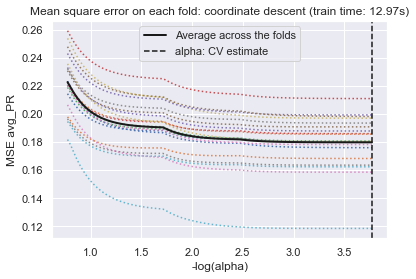

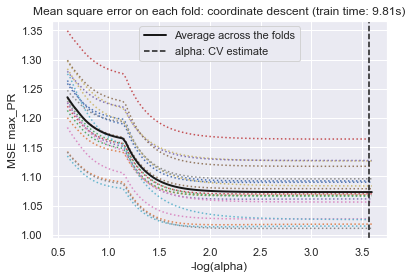

c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


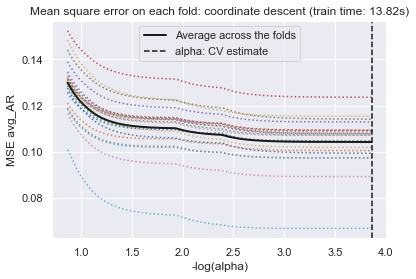

c:\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


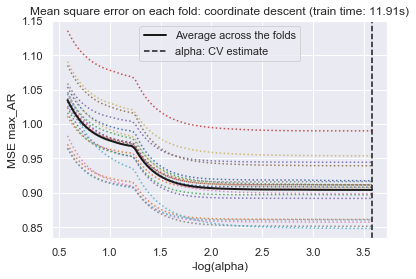

In [11]:
import time
for y_col in impact:
    from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
    t1 = time.time()
    X = df_zscores[[x_col + '_zscore' for x_col in linear_metrics]]
    y = df_log[y_col + '_log']

    model = LassoCV(cv=20).fit(X, y)
    t_lasso_cv = time.time() - t1
    # Display results
    m_log_alphas = -np.log10(model.alphas_)

    plt.figure()
    plt.plot(m_log_alphas, model.mse_path_, ':')
    plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
    plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
                label='alpha: CV estimate')

    plt.legend()

    plt.xlabel('-log(alpha)')
    plt.ylabel('MSE ' + y_col)
    plt.title('Mean square error on each fold: coordinate descent '
              '(train time: %.2fs)' % t_lasso_cv)
    plt.axis('tight')
    plt.show()
